<a href="https://colab.research.google.com/github/haniklakhe18/Temperature_analysis/blob/main/3_Ensemble_plotting_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Indices/Ensemble'

/content/drive/.shortcut-targets-by-id/1BBkjA5D9rIVQl4WqjLSgE0LYjPK4dPfq/Indices/Ensemble


In [ ]:
!pip install geopandas
!pip install rasterio
!pip install pyidw
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import numpy as np
import fiona
from sklearn.metrics import mean_squared_error
import rasterio
import rasterio.plot
import rasterio.mask
import glob
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from matplotlib.colors import Normalize
import math
import os
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 52.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Read shapefiles
Nepal = gpd.read_file('Shapefile/Nepal_GCS.shp')
Nepal = Nepal.to_crs("EPSG:4326")
CMIP6_Nepal = gpd.read_file('Shapefile/CMIP6_Nepal.shp')
CMIP6_Nepal = CMIP6_Nepal.to_crs("EPSG:4326")
CMIP6_Nepal.rename(columns={'SN': 'Station'}, inplace=True)

In [ ]:
#CM = ['ACCESS-CM2','ACCESS-ESM1-5','BCC-CSM2-MR','CanESM5',
#     'MPI-ESM1-2-LR','MPI-ESM1-2-HR','MRI-ESM2-0','NorESM2-LM',
#      'NorESM2-MM','Ensemble_median']
CM = ['Ensemble_median']

scenario = ['ssp126', 'ssp245', 'ssp370', 'ssp585']

CM_dict = {}

for i in tqdm(range(0,len(CM))):
    CM_dict[CM[i]] = {}
    for j in range(0,len(scenario)):
        ssp_dict = {}
        CM_dict[CM[i]][scenario[j]] = ssp_dict
        file_path = str(CM[i]) + '/' + str(scenario[j]) + '/'
        indices_files = glob.glob('Database' + '/' + file_path + '*.csv')
        for k in range(0, len(indices_files)):
            indices = pd.read_csv(indices_files[k])
            # Extract the filename without the extension and use it as the key
            #indice_name = indices_files[k][25:-4]
            base_name = os.path.basename(indices_files[k])
            indice_name = os.path.splitext(base_name)[0]
            #print(indice_name)
            ssp_dict[indice_name] = pd.merge(CMIP6_Nepal, indices, on='Station')

# Now you can access the data using the nested dictionary structure
# For example: CM_dict['ACCESS-CM2']['ssp126']['DTR']


100%|██████████| 1/1 [00:43<00:00, 43.60s/it]


  0%|          | 0/6 [00:00<?, ?it/s]

1.0
33.0


<ipython-input-6-8b87cf2b9dd0>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


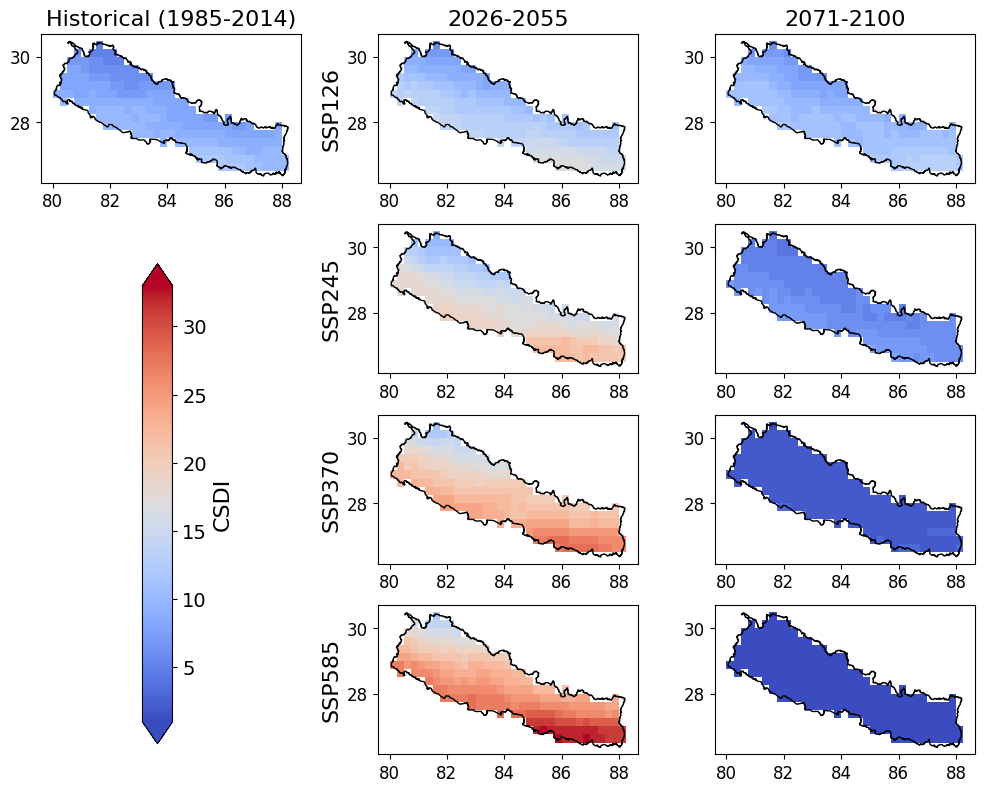

 17%|█▋        | 1/6 [00:09<00:48,  9.65s/it]

1.0
34.0


<ipython-input-6-8b87cf2b9dd0>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


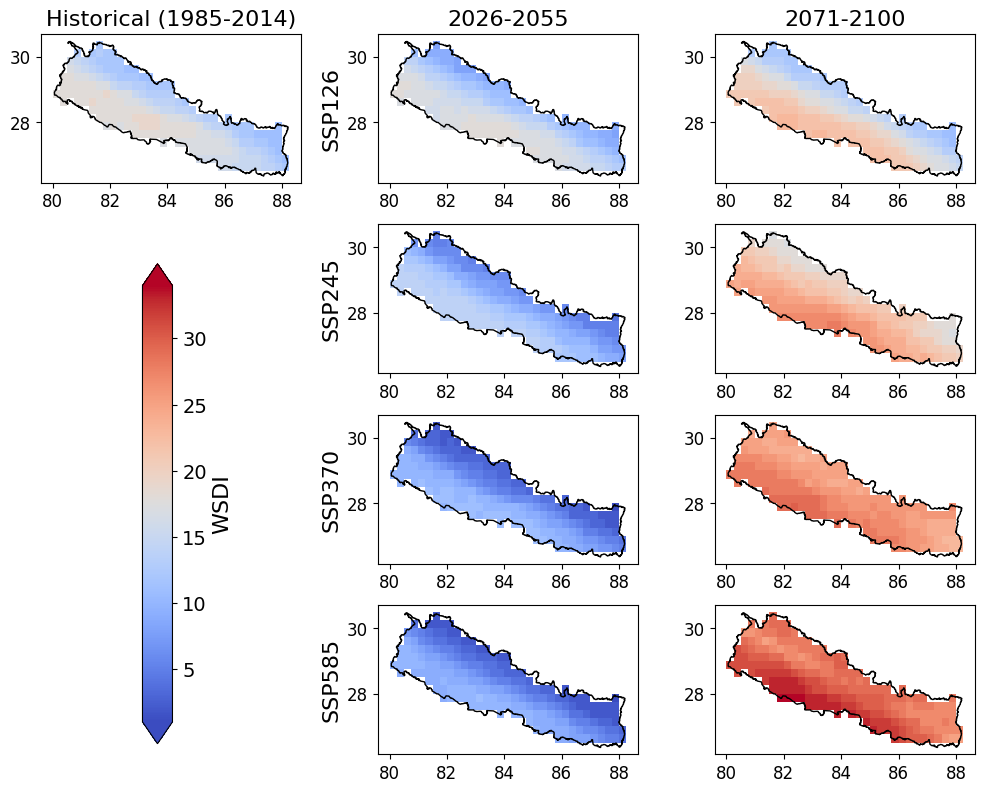

 33%|███▎      | 2/6 [00:20<00:41, 10.34s/it]

3.0
15.0


<ipython-input-6-8b87cf2b9dd0>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


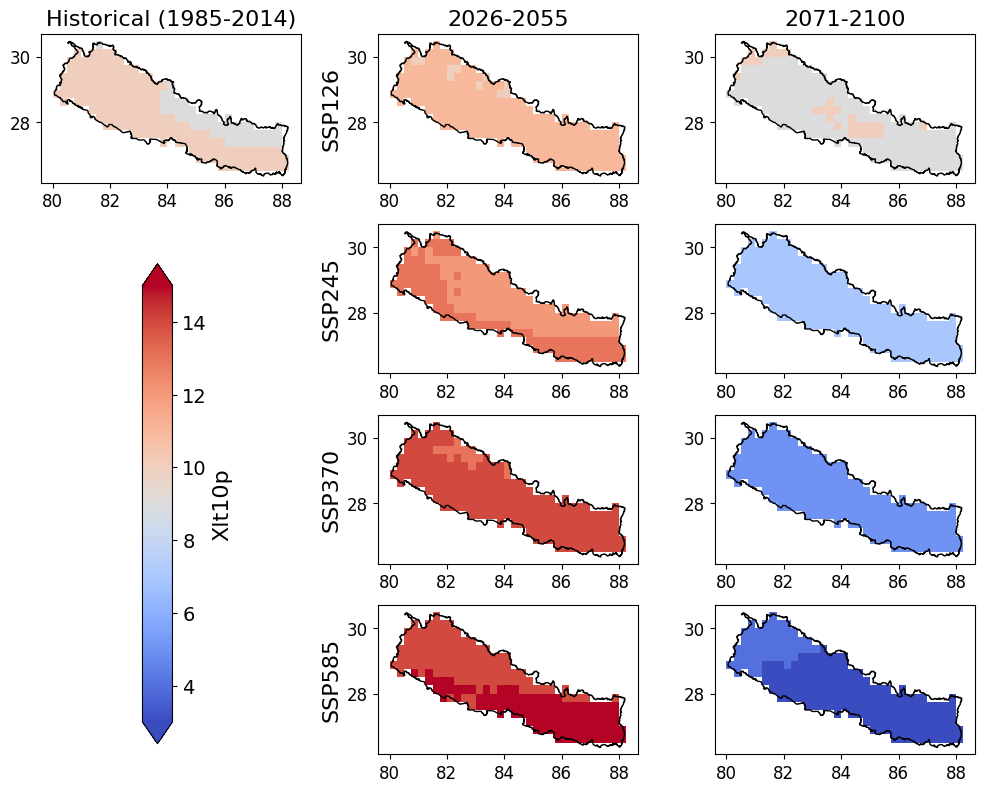

 50%|█████     | 3/6 [00:29<00:28,  9.58s/it]

2.0
16.0


<ipython-input-6-8b87cf2b9dd0>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


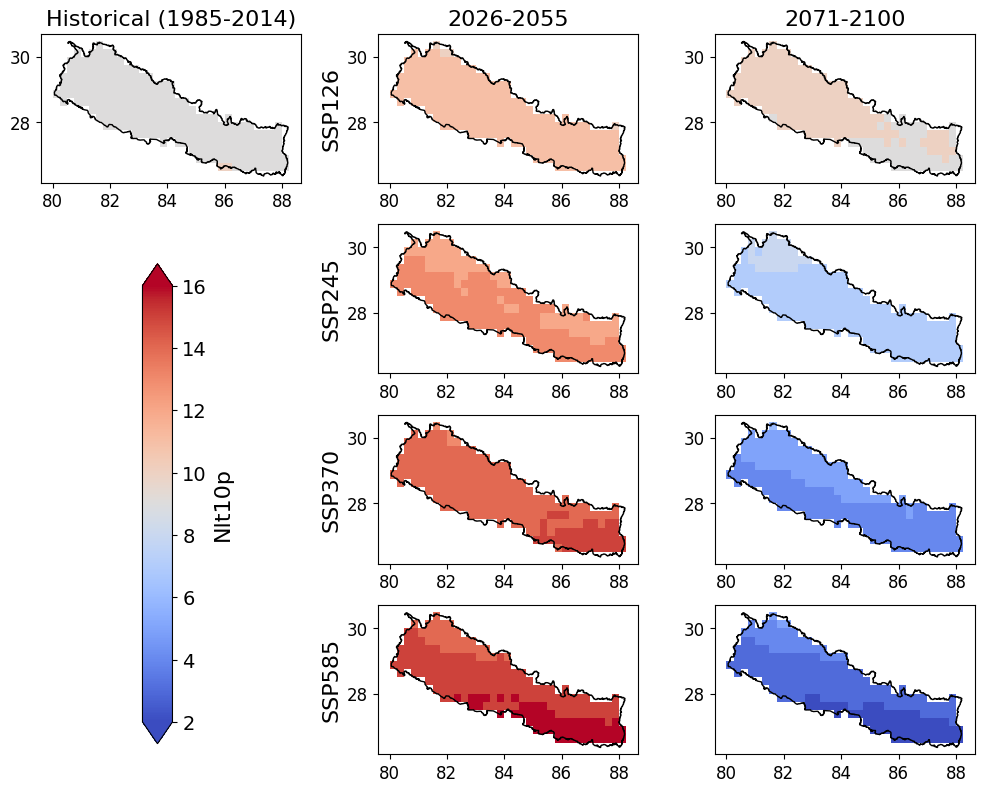

 67%|██████▋   | 4/6 [00:43<00:22, 11.34s/it]

1.0
24.0


<ipython-input-6-8b87cf2b9dd0>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


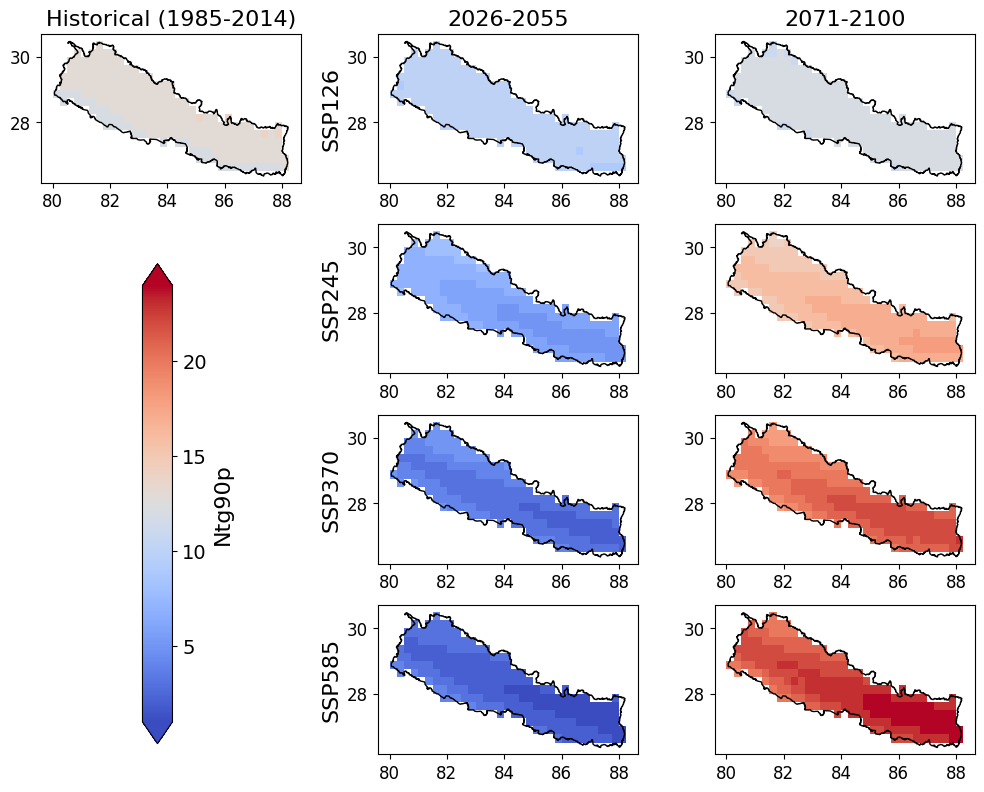

 83%|████████▎ | 5/6 [00:55<00:11, 11.78s/it]

4.0
20.0


<ipython-input-6-8b87cf2b9dd0>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


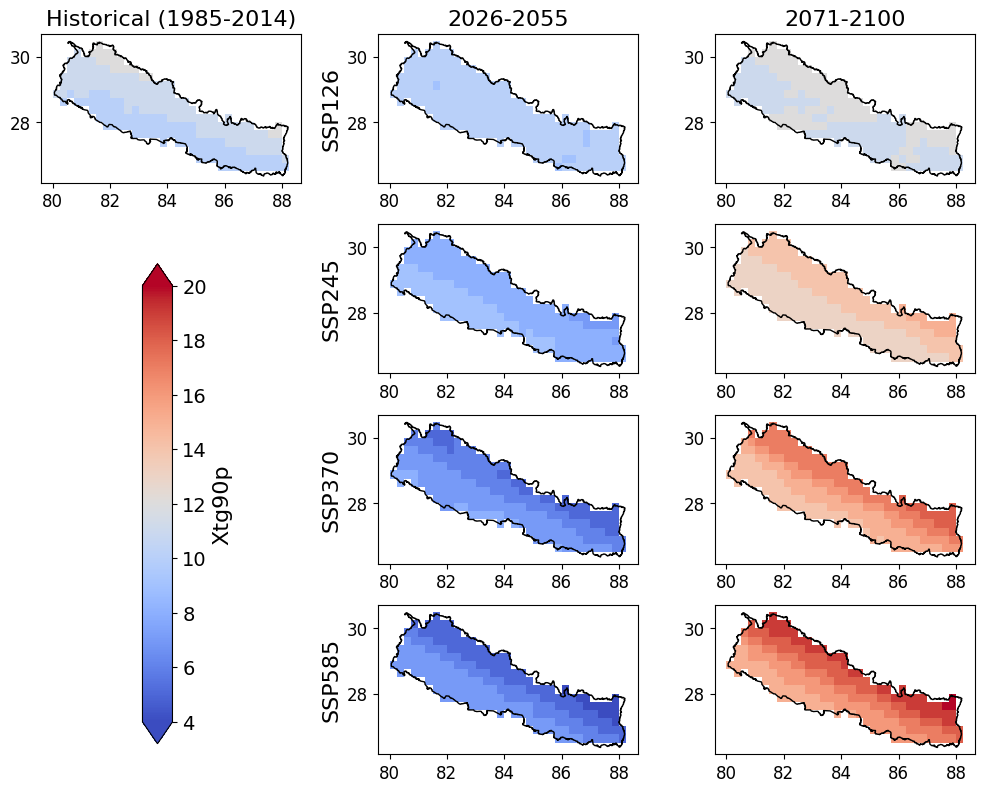

100%|██████████| 6/6 [01:04<00:00, 10.75s/it]


In [ ]:
#indices = list(CM_dict['Ensemble_median']['ssp126'].keys())
indices = ['CSDI','WSDI','Xlt10p','Nlt10p','Ntg90p','Xtg90p']
time_periods = ['1985-2014','2026-2055', '2071-2100']
for h in tqdm(range(0,len(indices))):
  min_val_list = []  # List to store all minimum values
  max_val_list = []  # List to store all maximum values
  for i in range(0, len(CM)):
    for j in range(0, len(scenario)):
      min_val = CM_dict[CM[i]][scenario[j]][indices[h]].iloc[:, 152:155].min().min()
      max_val = CM_dict[CM[i]][scenario[j]][indices[h]].iloc[:, 152:155].max().max()
      min_val_list.append(min_val)
      max_val_list.append(max_val)
  vmin = min(min_val_list)
  vmax = max(max_val_list)
  print(vmin)
  print(vmax)
  #vmin = math.floor(min(min_val_list) / 10) * 10
  #vmax = math.ceil(max(max_val_list) / 10) * 10
  for i in range(0,len(CM)):
    fig, axs = plt.subplots(len(scenario), len(time_periods), figsize=(10, 8))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    cmap = plt.cm.coolwarm
    norm = Normalize(vmin=vmin, vmax=vmax)
    cax = fig.add_axes([0.15, 0.065, 0.03, 0.6])  # [x, y, width, height]
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                      cax=cax, orientation='vertical', extend='both',
                      shrink=0.5, location='right', label=indices[h])
    cb.set_label(indices[h], fontsize=16)
    cb.ax.tick_params(labelsize=14)

    for j in range(0,len(scenario)):
        data = CM_dict[CM[i]][scenario[j]][indices[h]]
        for l in range(0,len(time_periods)):
          ax = axs[j, l]
          if (j>0) and (l==0):
            ax.remove()
          elif j==0 and l ==0:
            data.plot(column=time_periods[l], cmap='coolwarm',
                              vmin=vmin, vmax=vmax, markersize=3,
                              ax=ax)
            Nepal.plot(edgecolor="k", color='none', ax=ax)
            ax.set_ylabel('')
            ax.set_title('Historical (1985-2014)', fontsize = 16)
            # Adjust the font size of tick labels on the plot axes
            ax.tick_params(axis='both', which='major', labelsize=12)
          else:
            data.plot(column=time_periods[l], cmap='coolwarm',
                              vmin=vmin, vmax=vmax, markersize=3,
                              ax=ax)
            Nepal.plot(edgecolor="k", color='none', ax=ax)
            # Adjust the font size of tick labels on the plot axes
            ax.tick_params(axis='both', which='major', labelsize=12)
            if j == 0:
              ax.set_title(f'{time_periods[l]}', fontsize = 16)
          if l == 1:
            ax.set_ylabel(scenario[j].upper(), fontsize=16)
    plt.tight_layout()
    #plt.savefig( ' ', bbox_inches='tight',dpi=300)
    plt.show()



In [ ]:
CM_dict[CM[i]][scenario[j]][indices[h]].iloc[:, 152:153]
#print(CM_dict[CM[i]][scenario[j]][indices[h]].iloc[:, 155:157])

1985-2014
0         12.0
1         11.0
2         12.0
3         12.0
4         12.0
..         ...
210       10.0
211       10.0
212       10.0
213       10.0
214       10.0

[215 rows x 1 columns]

  0%|          | 0/30 [00:00<?, ?it/s]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


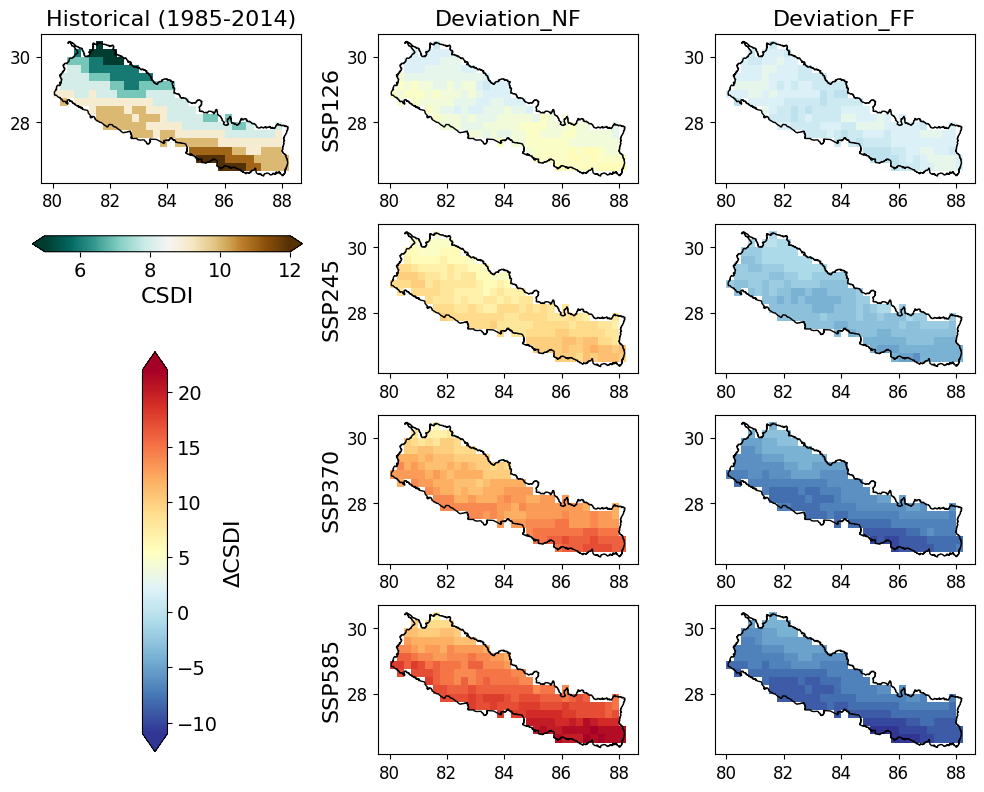

  3%|▎         | 1/30 [00:13<06:43, 13.91s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


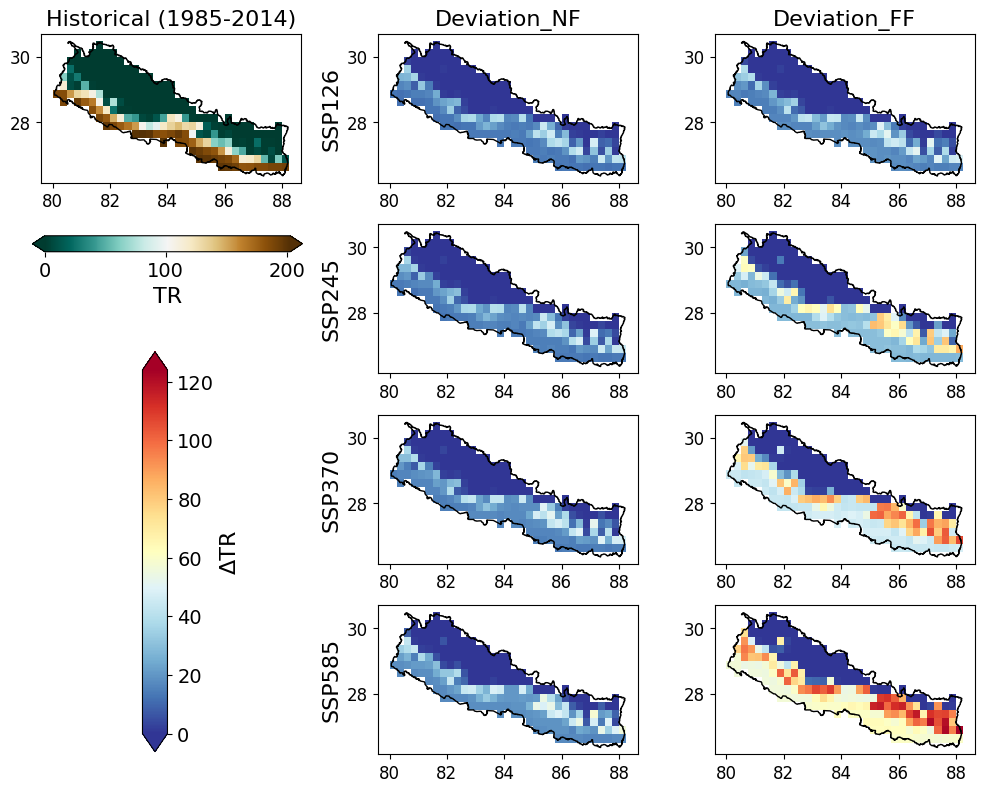

  7%|▋         | 2/30 [00:27<06:30, 13.96s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


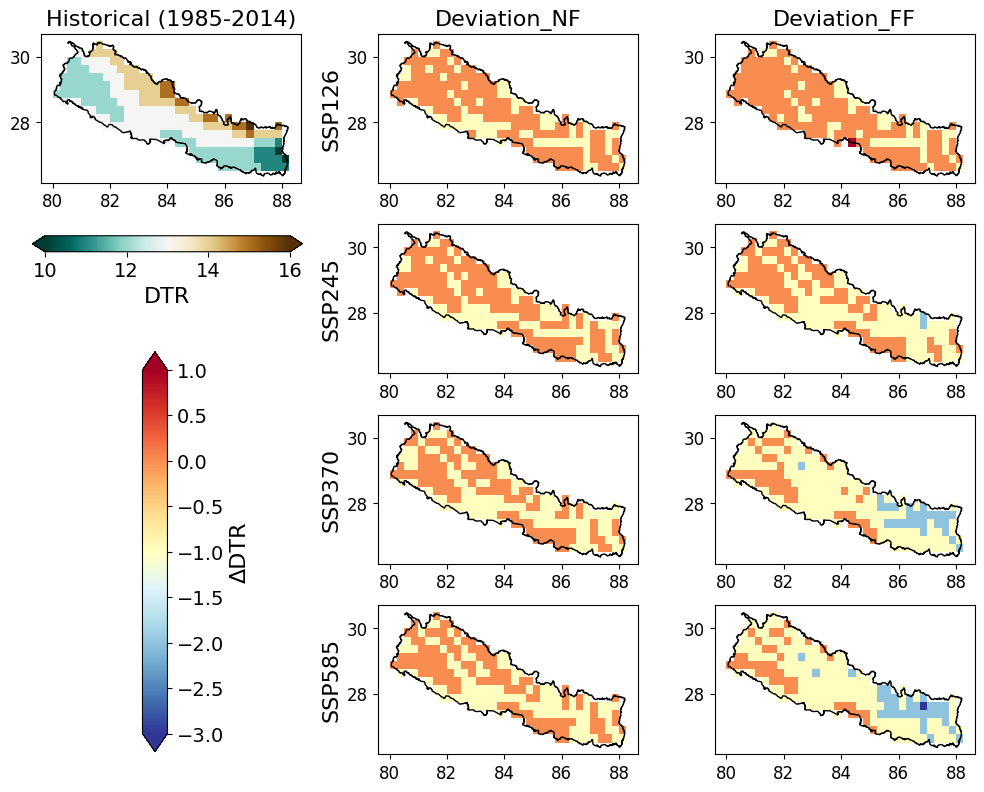

 10%|█         | 3/30 [00:42<06:22, 14.16s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


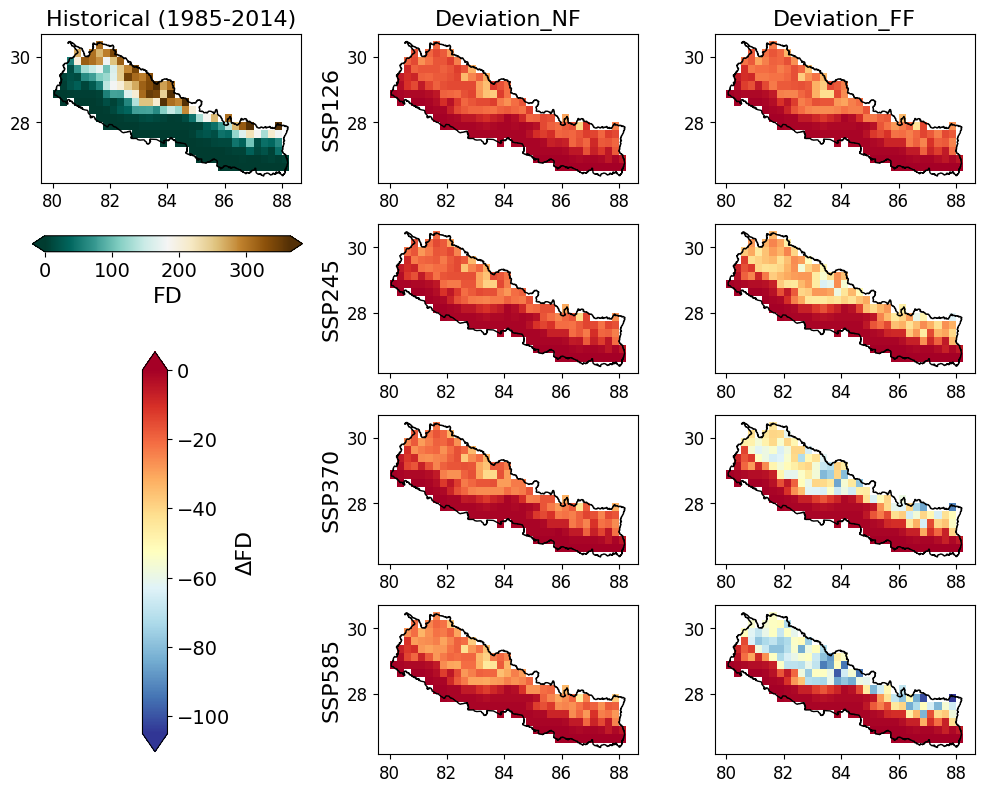

 13%|█▎        | 4/30 [00:55<06:00, 13.87s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


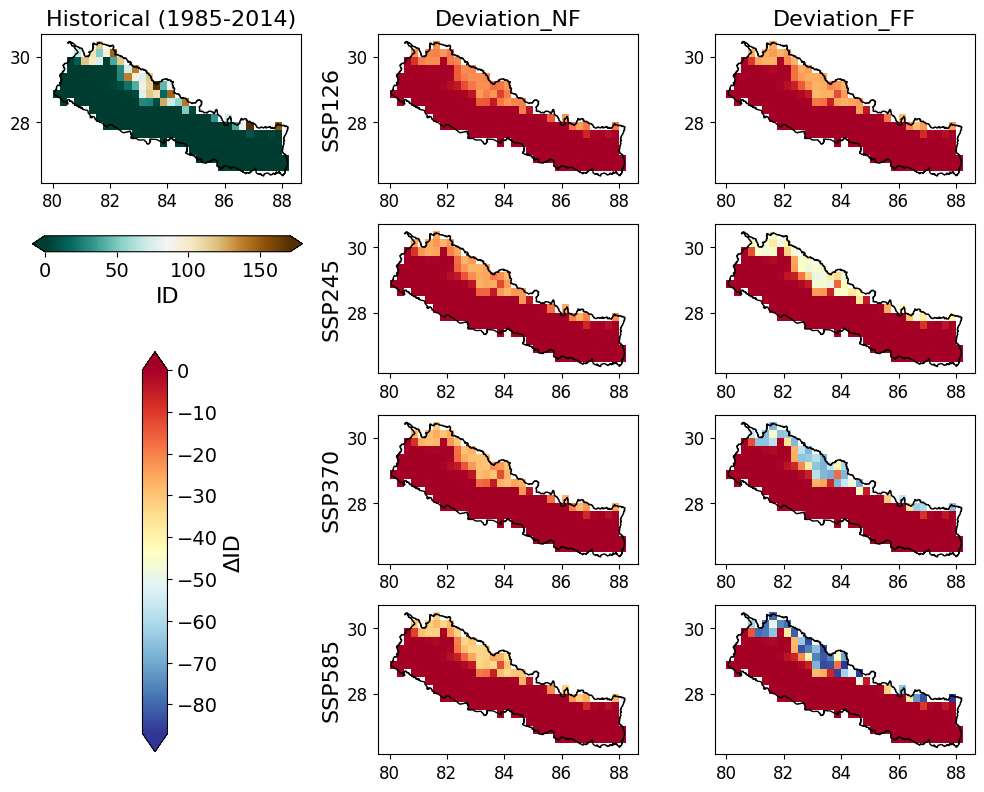

 17%|█▋        | 5/30 [01:08<05:33, 13.33s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


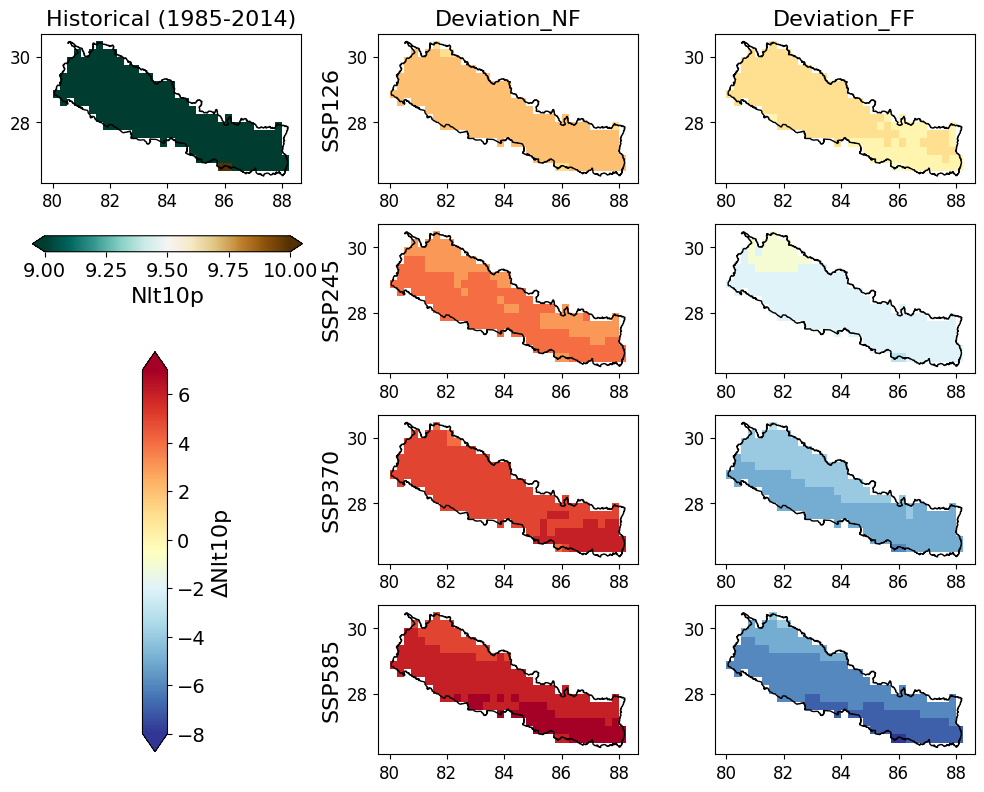

 20%|██        | 6/30 [01:21<05:19, 13.30s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


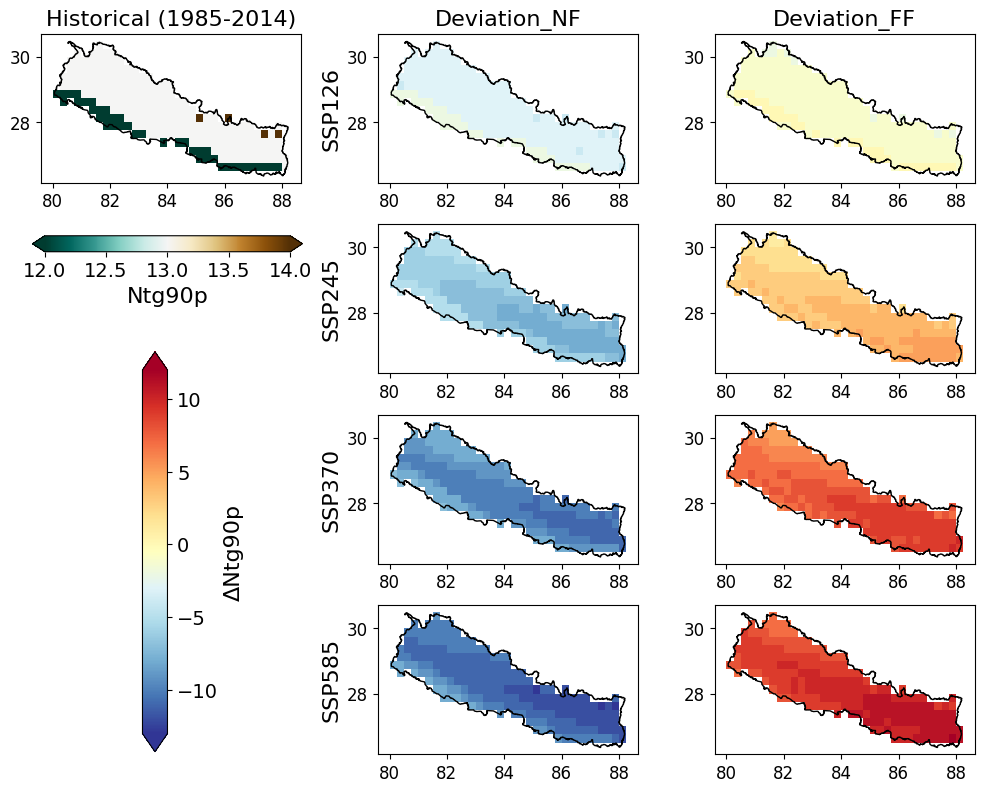

 23%|██▎       | 7/30 [01:35<05:11, 13.54s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


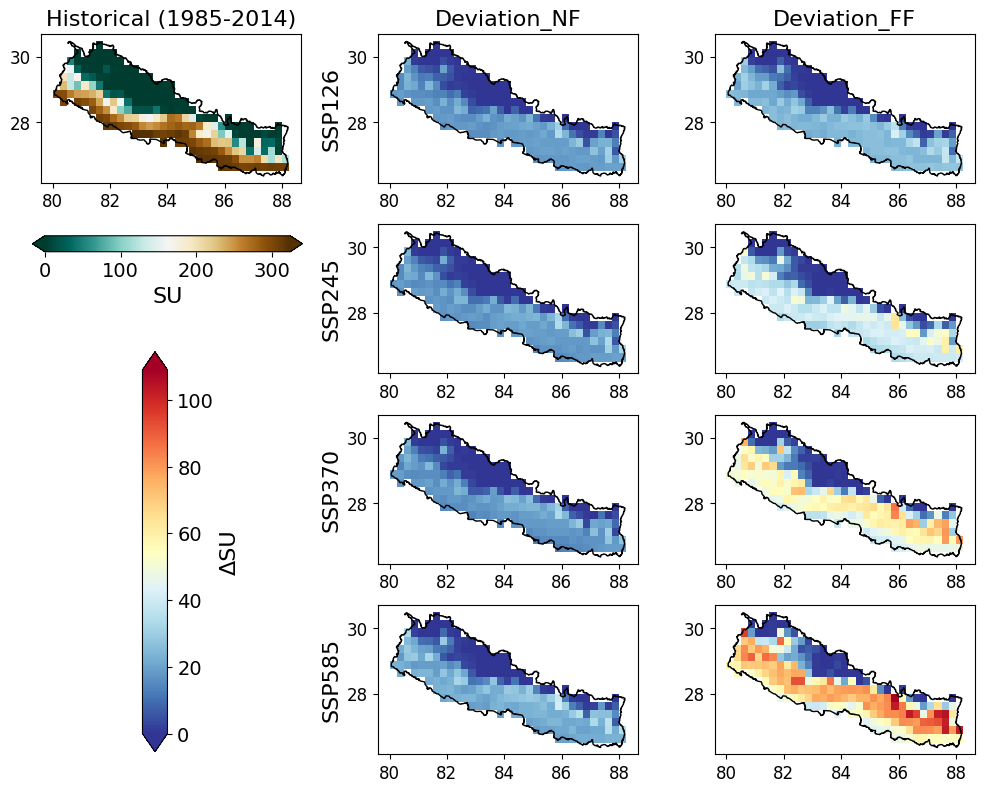

 27%|██▋       | 8/30 [01:49<05:00, 13.66s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


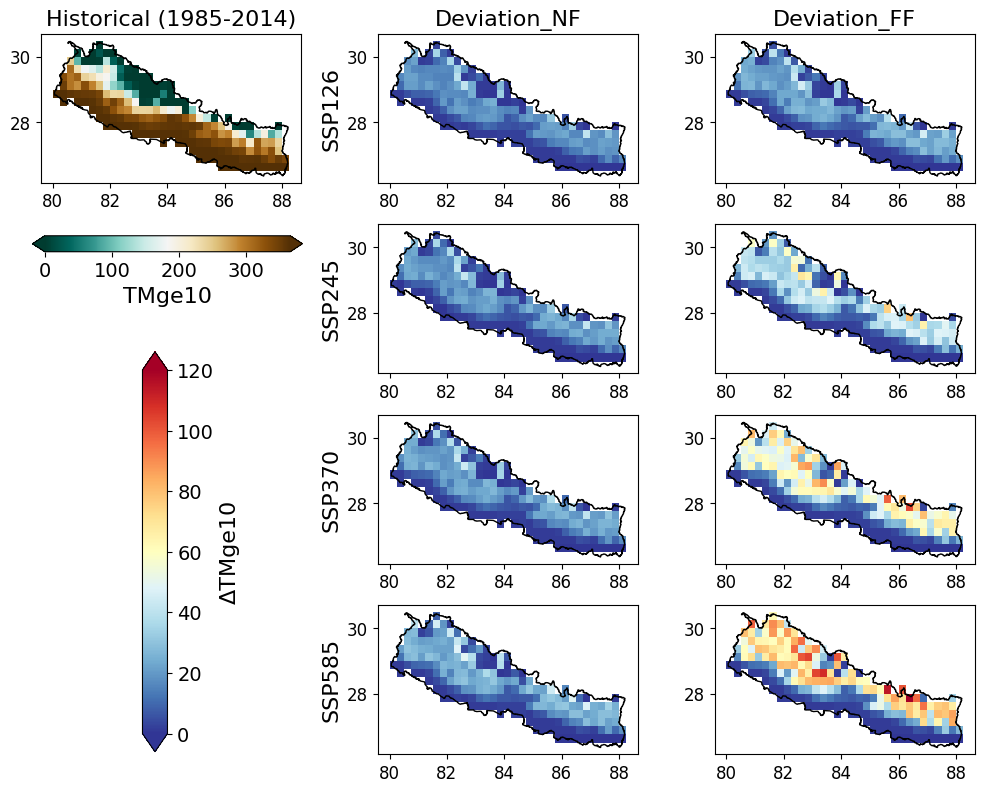

 30%|███       | 9/30 [02:02<04:43, 13.51s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


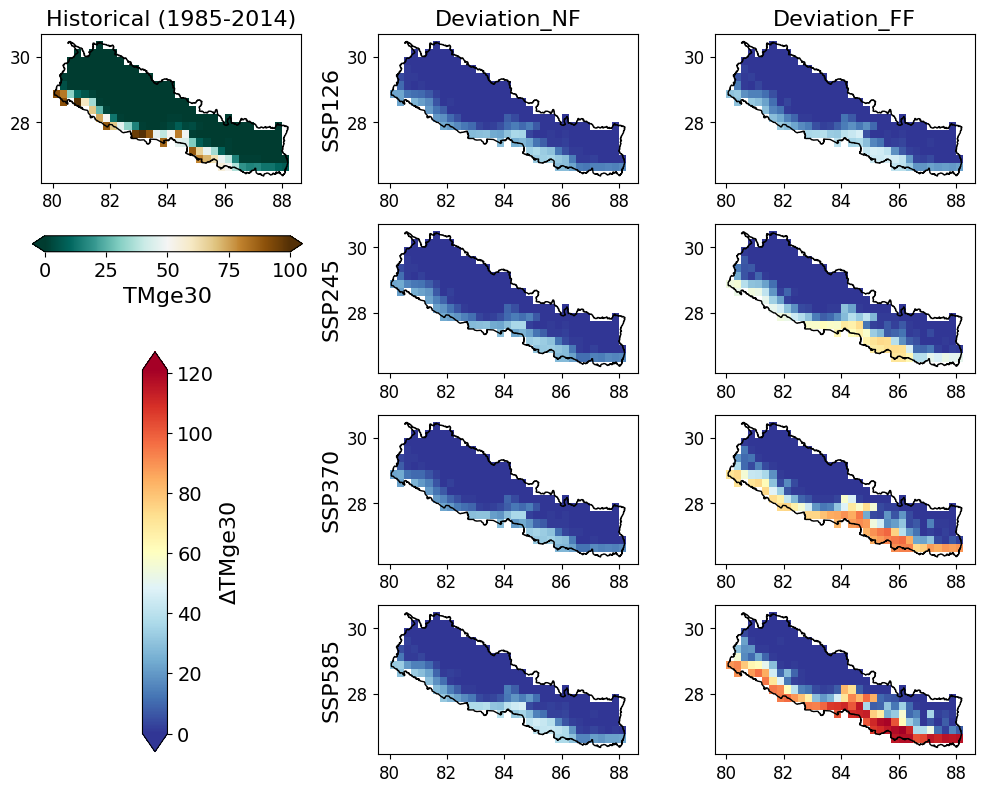

 33%|███▎      | 10/30 [02:14<04:22, 13.13s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


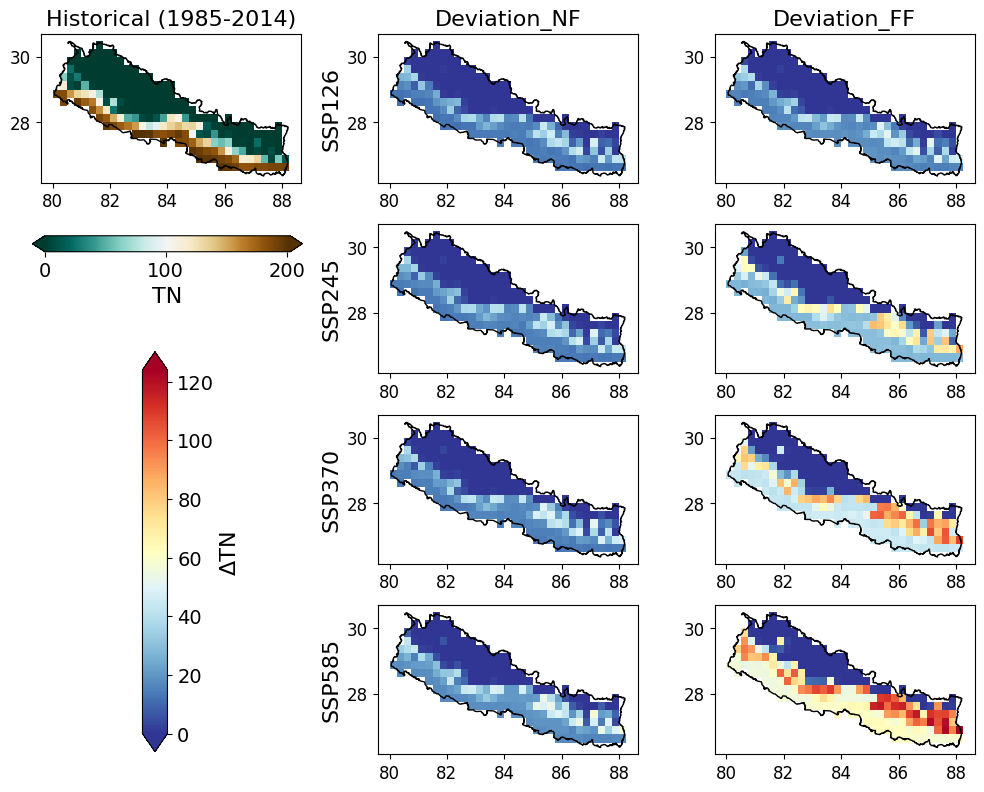

 37%|███▋      | 11/30 [02:28<04:13, 13.32s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


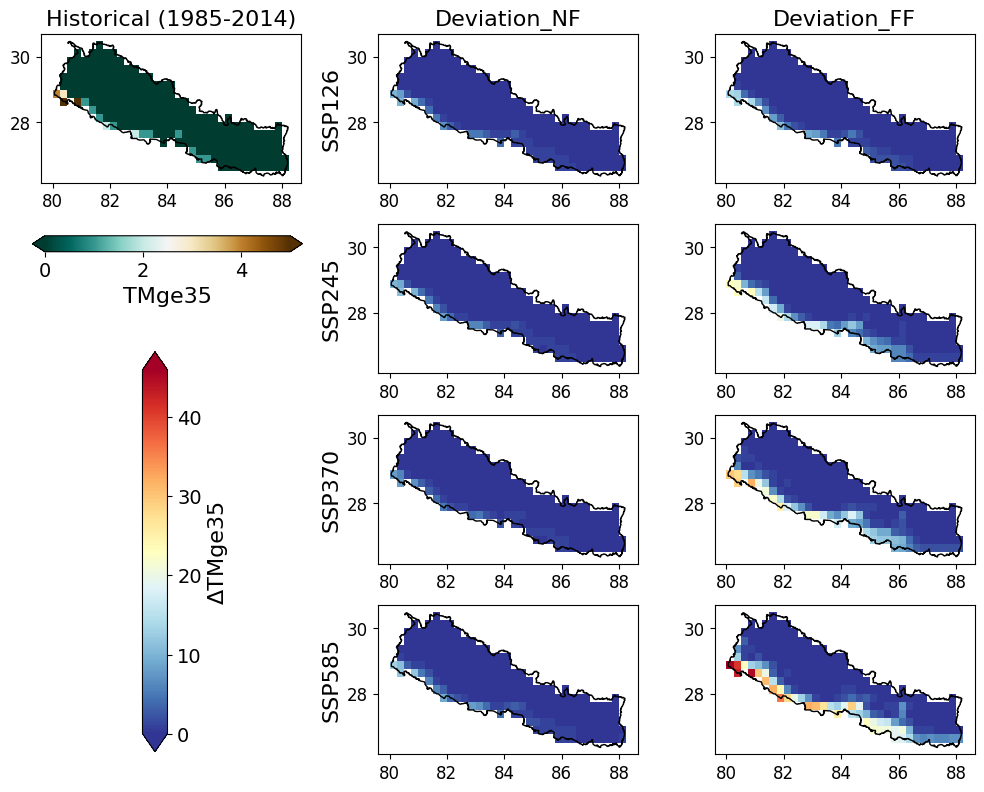

 40%|████      | 12/30 [02:42<04:02, 13.45s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


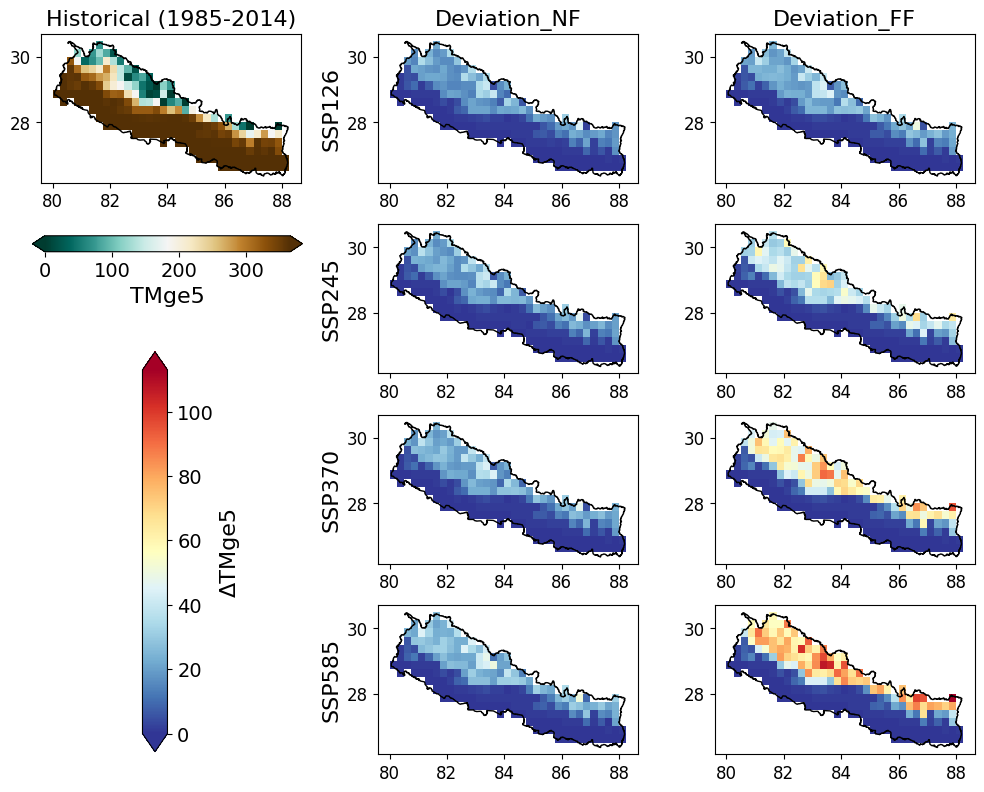

 43%|████▎     | 13/30 [02:56<03:51, 13.64s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


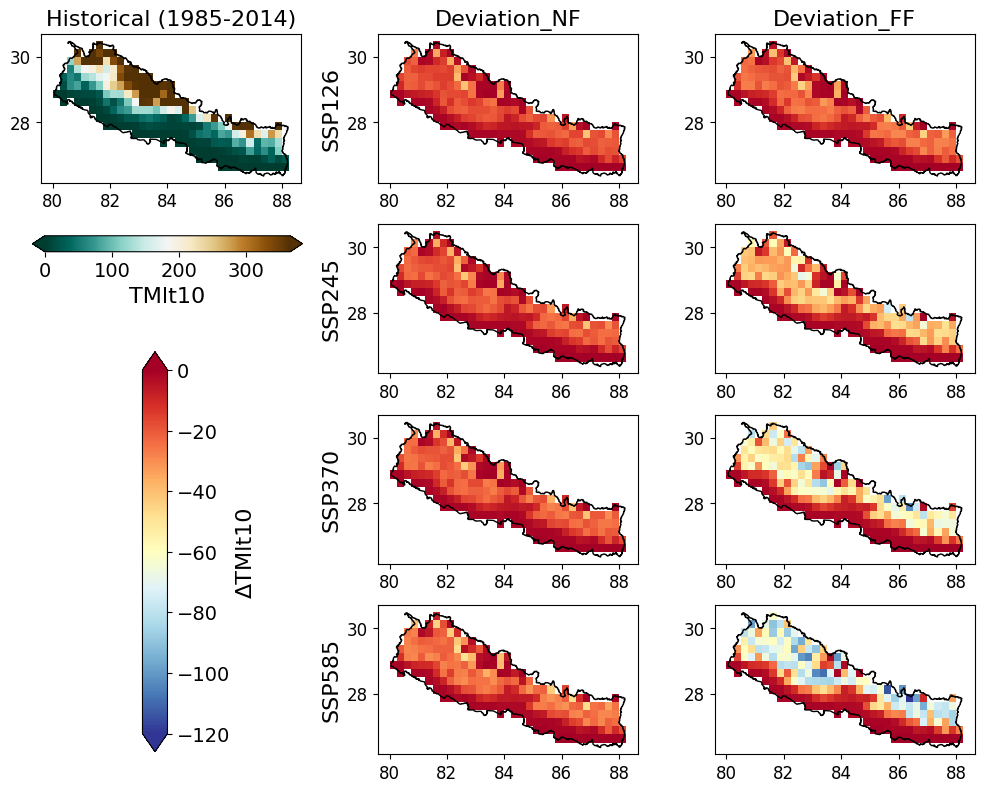

 47%|████▋     | 14/30 [03:09<03:36, 13.55s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


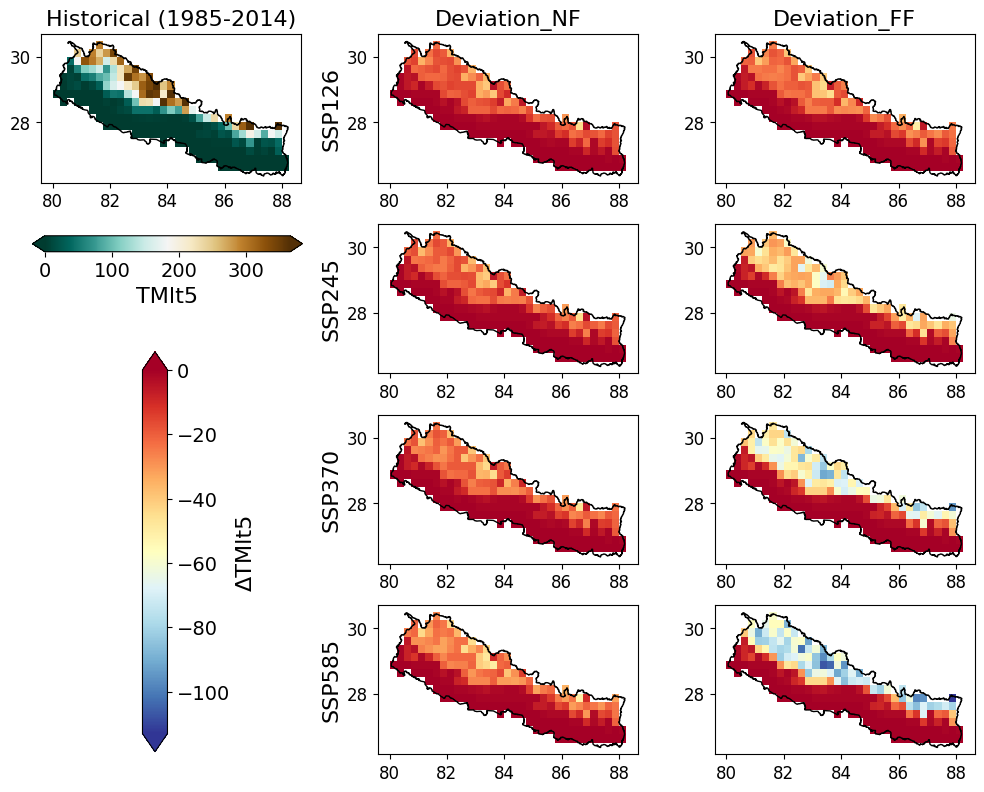

 50%|█████     | 15/30 [03:21<03:16, 13.10s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


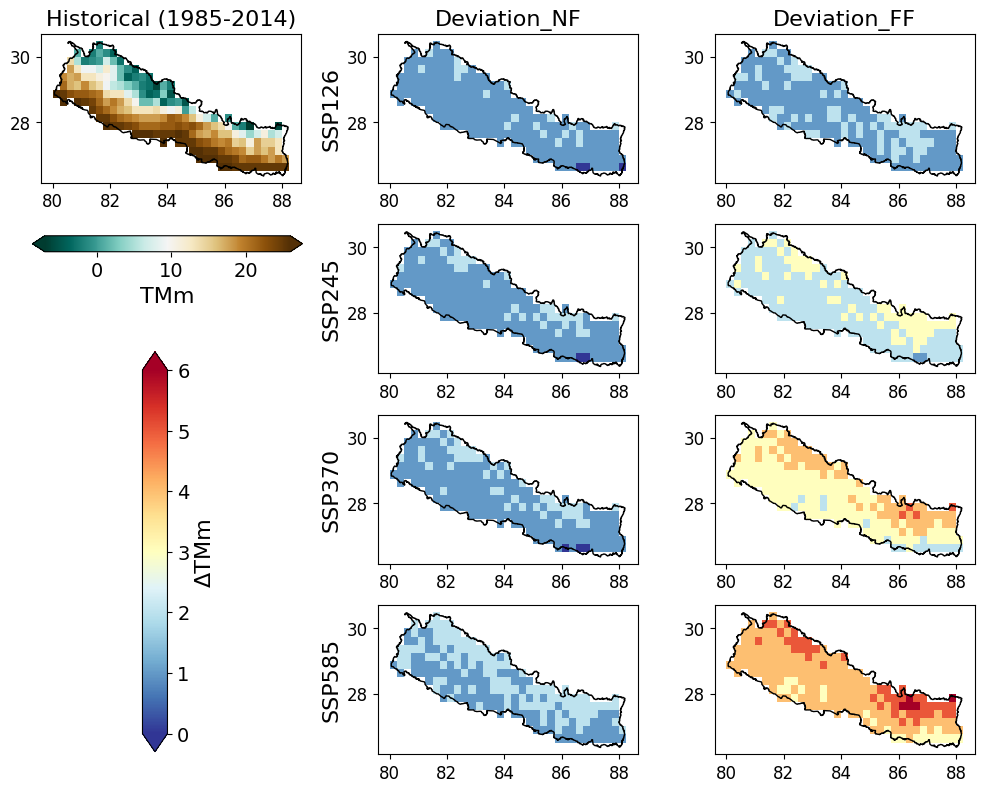

 53%|█████▎    | 16/30 [03:35<03:06, 13.34s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


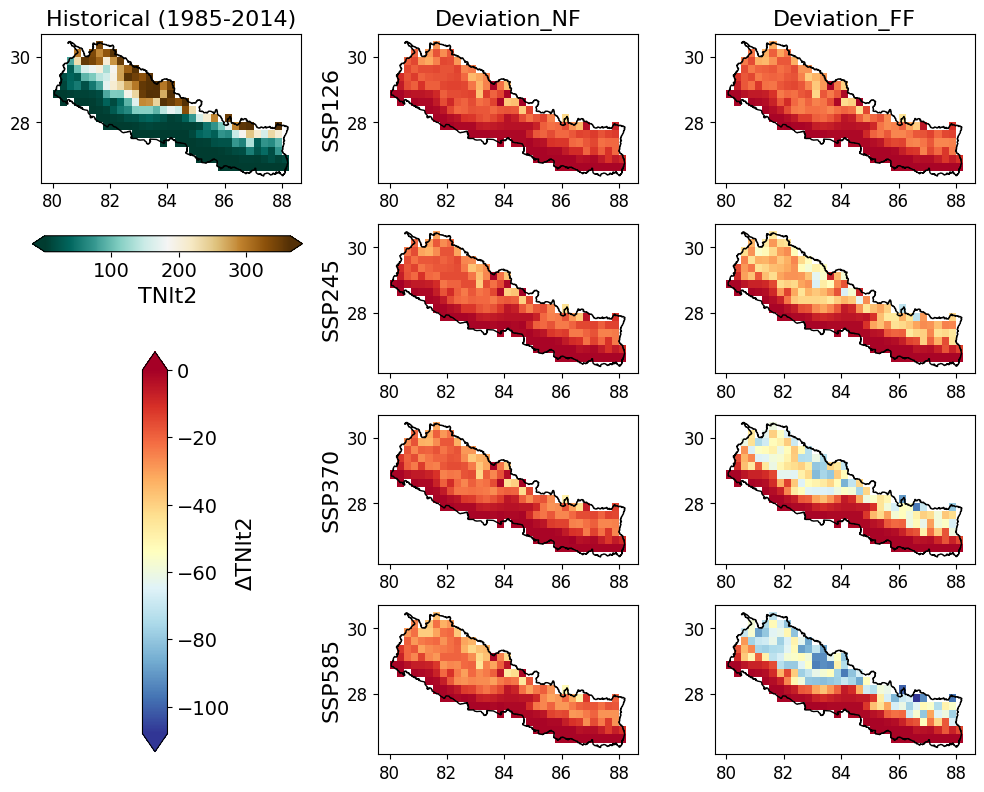

 57%|█████▋    | 17/30 [03:49<02:56, 13.55s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


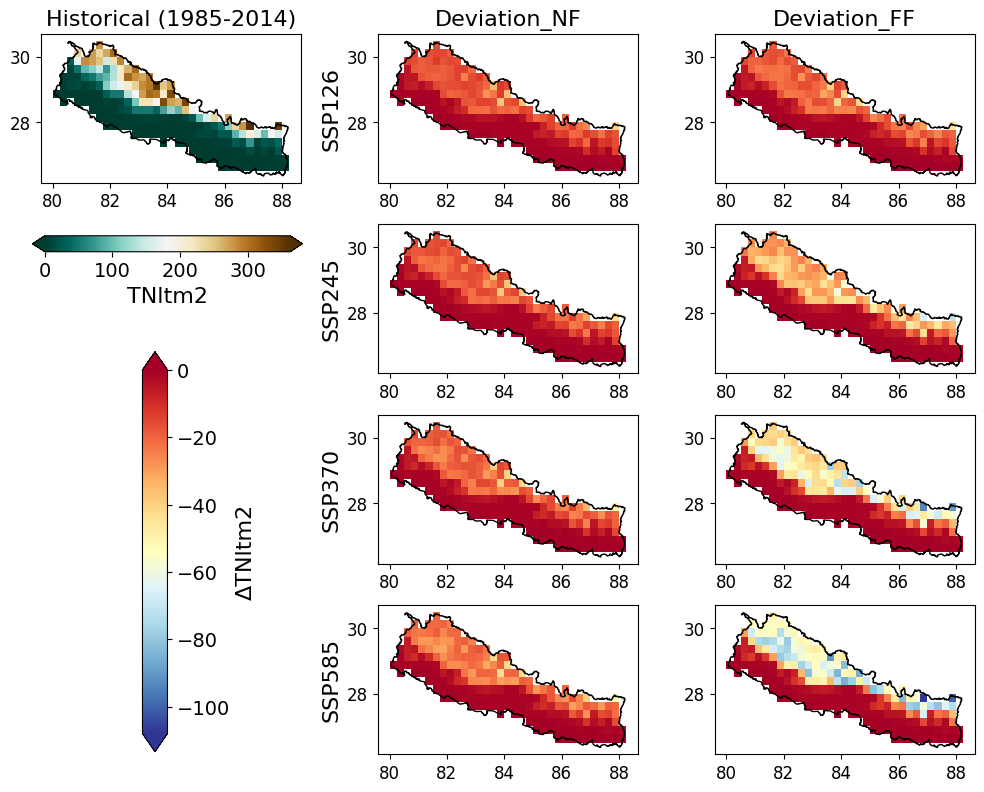

 60%|██████    | 18/30 [04:03<02:42, 13.57s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


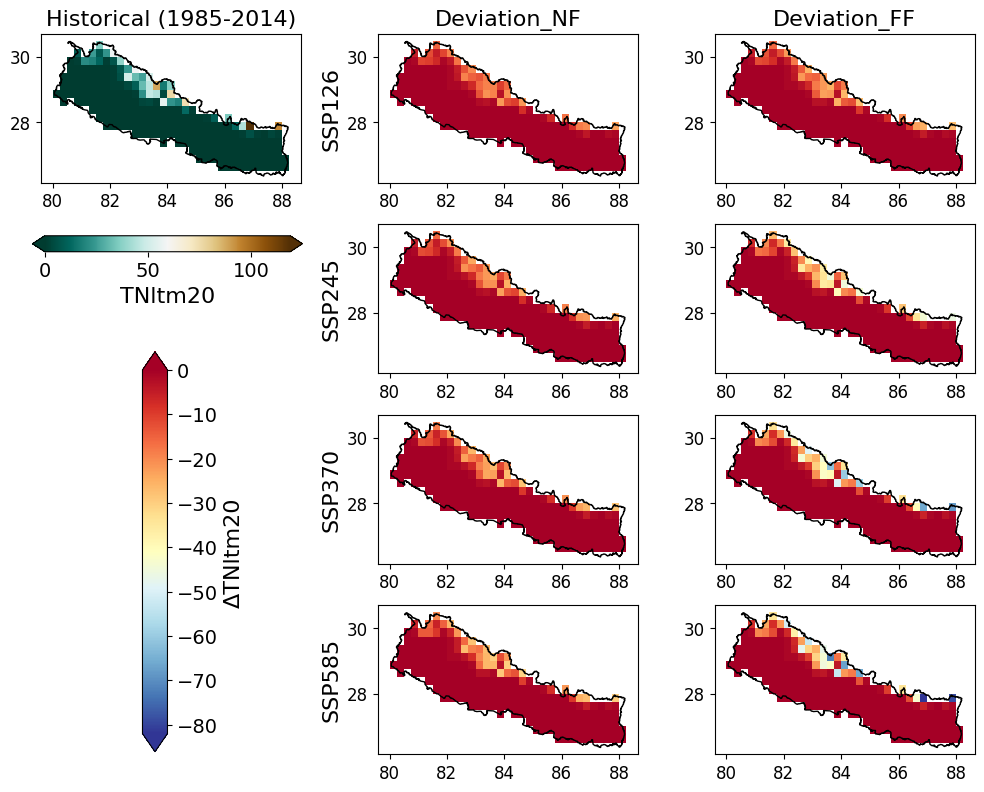

 63%|██████▎   | 19/30 [04:16<02:27, 13.44s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


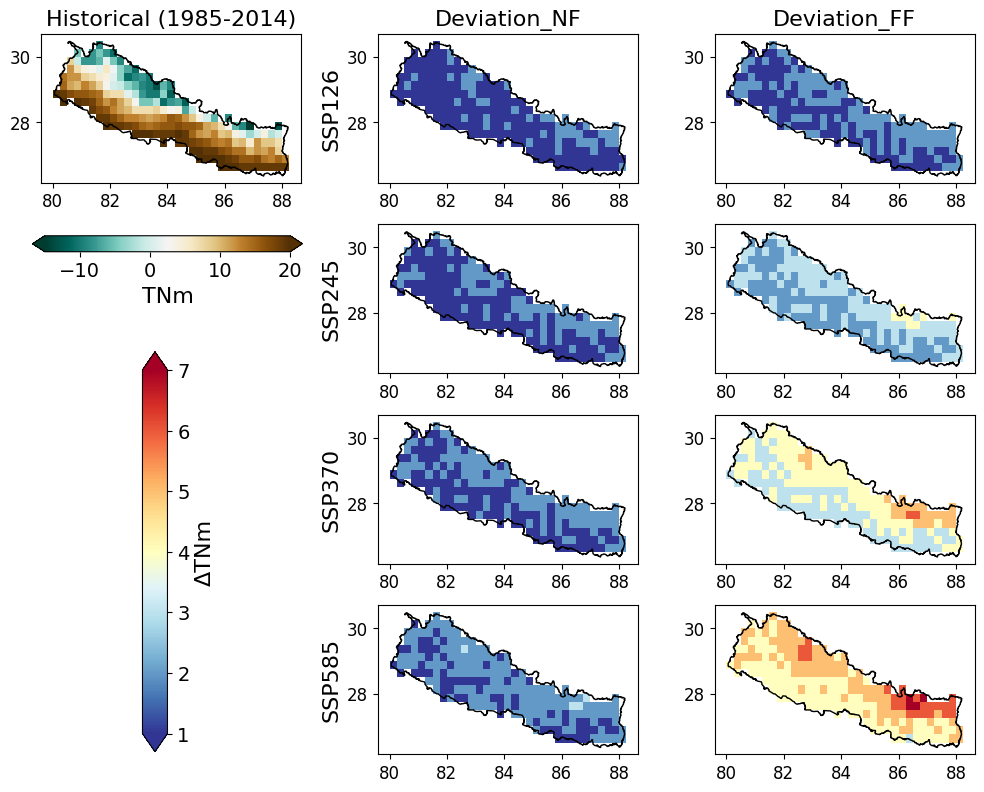

 67%|██████▋   | 20/30 [04:28<02:10, 13.09s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


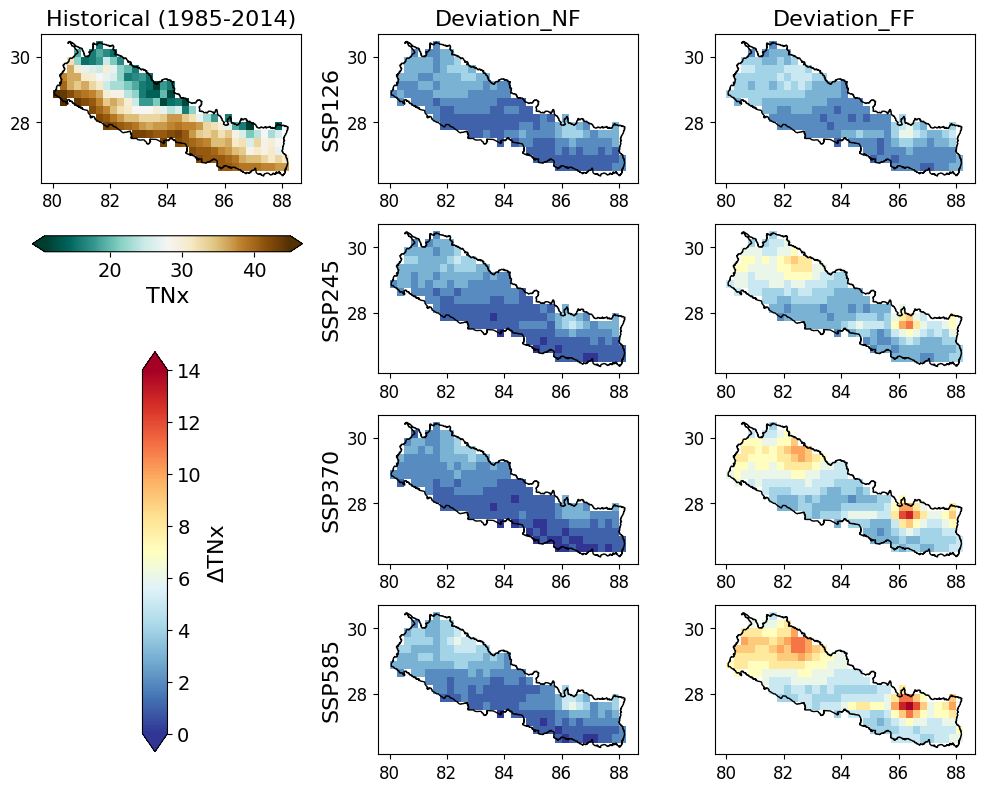

 70%|███████   | 21/30 [04:42<01:59, 13.23s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


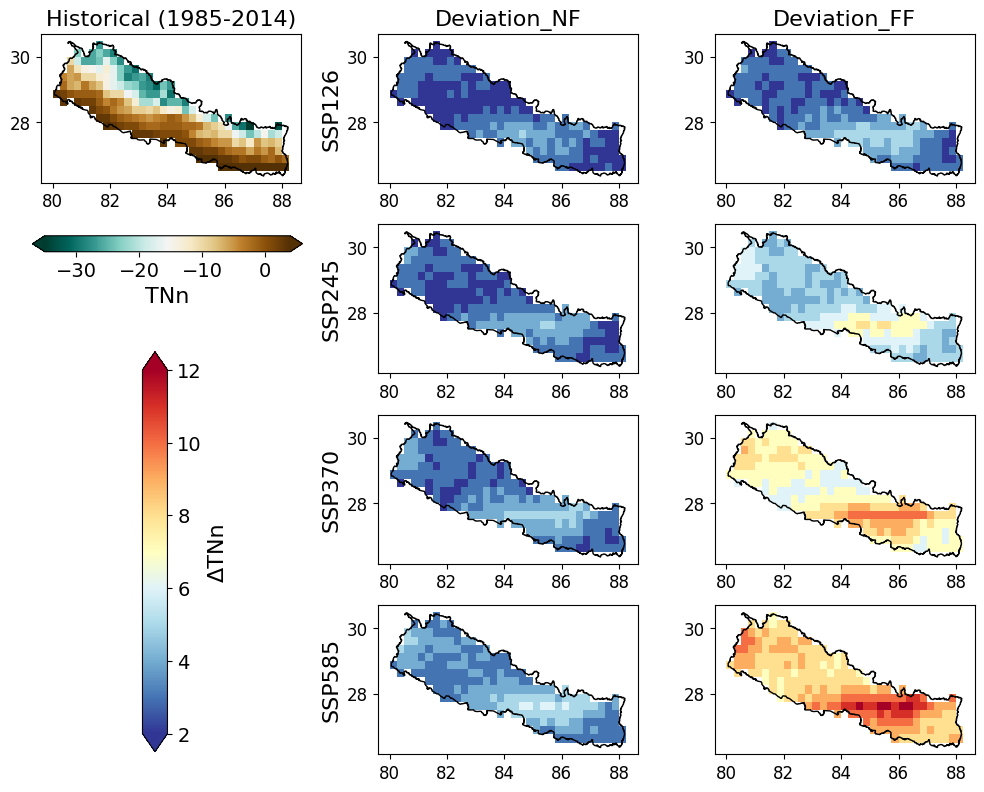

 73%|███████▎  | 22/30 [04:56<01:47, 13.48s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


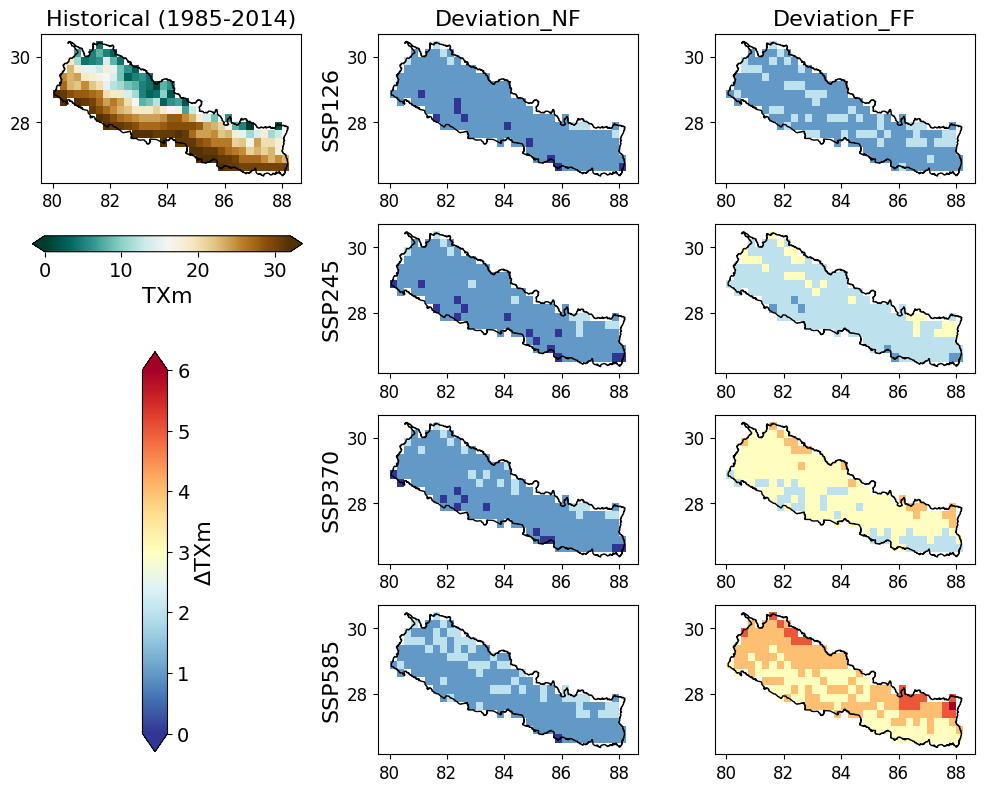

 77%|███████▋  | 23/30 [05:10<01:35, 13.65s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


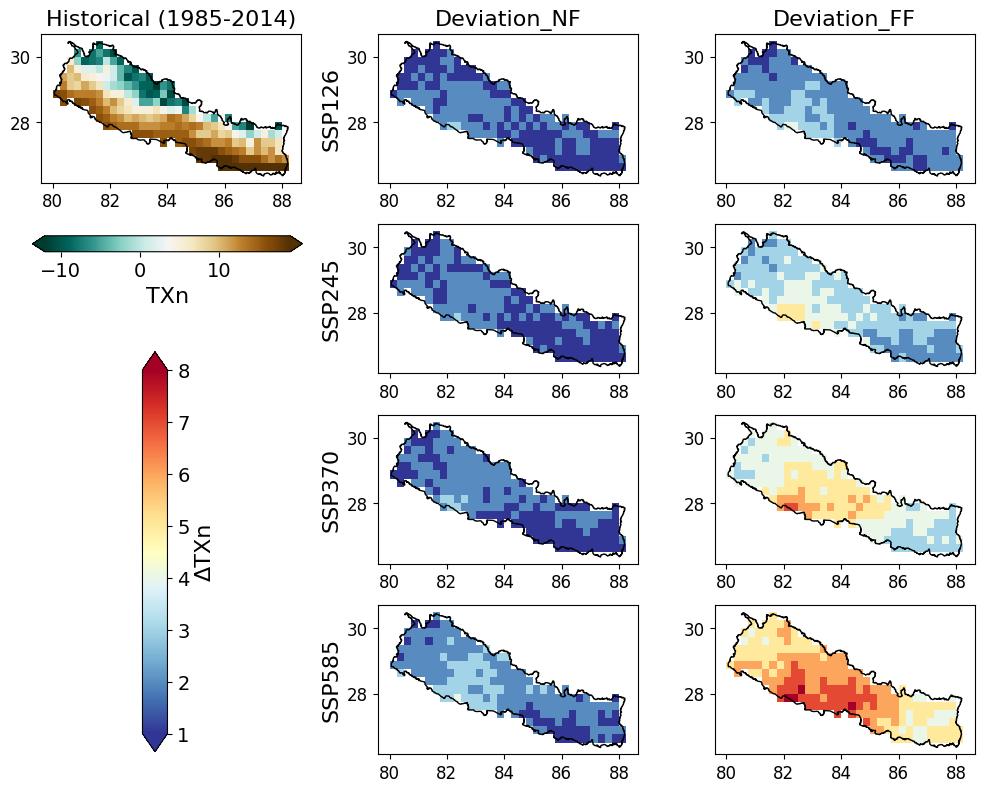

 80%|████████  | 24/30 [05:23<01:20, 13.39s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


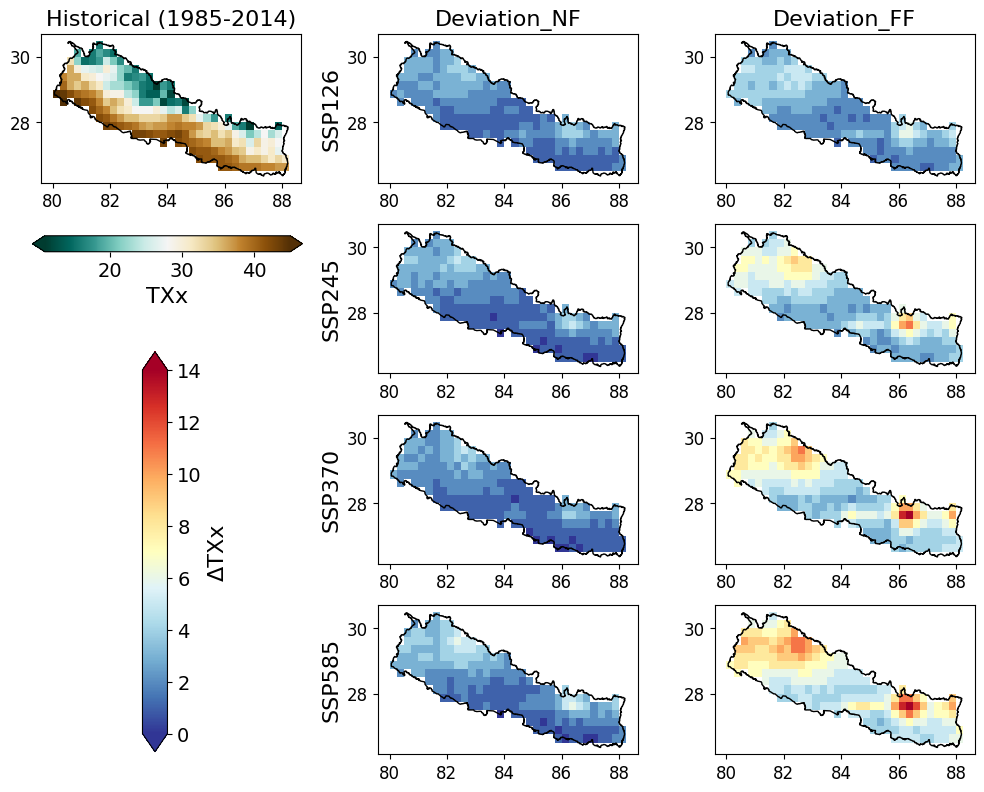

 83%|████████▎ | 25/30 [05:35<01:06, 13.20s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


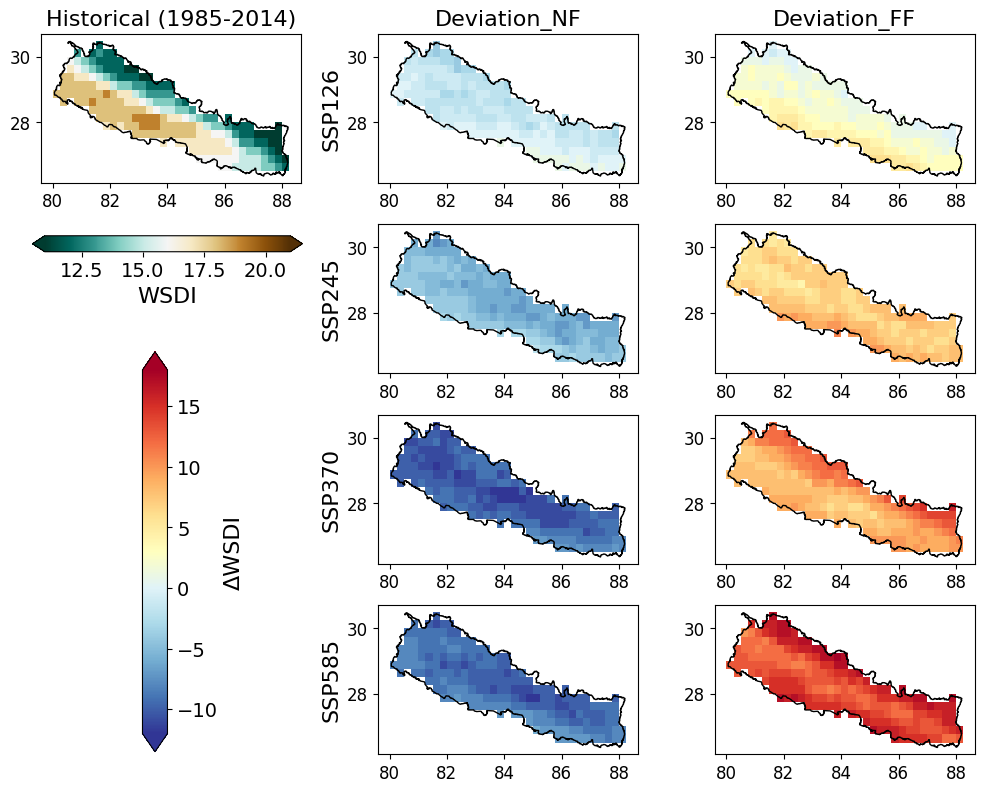

 87%|████████▋ | 26/30 [05:49<00:53, 13.39s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


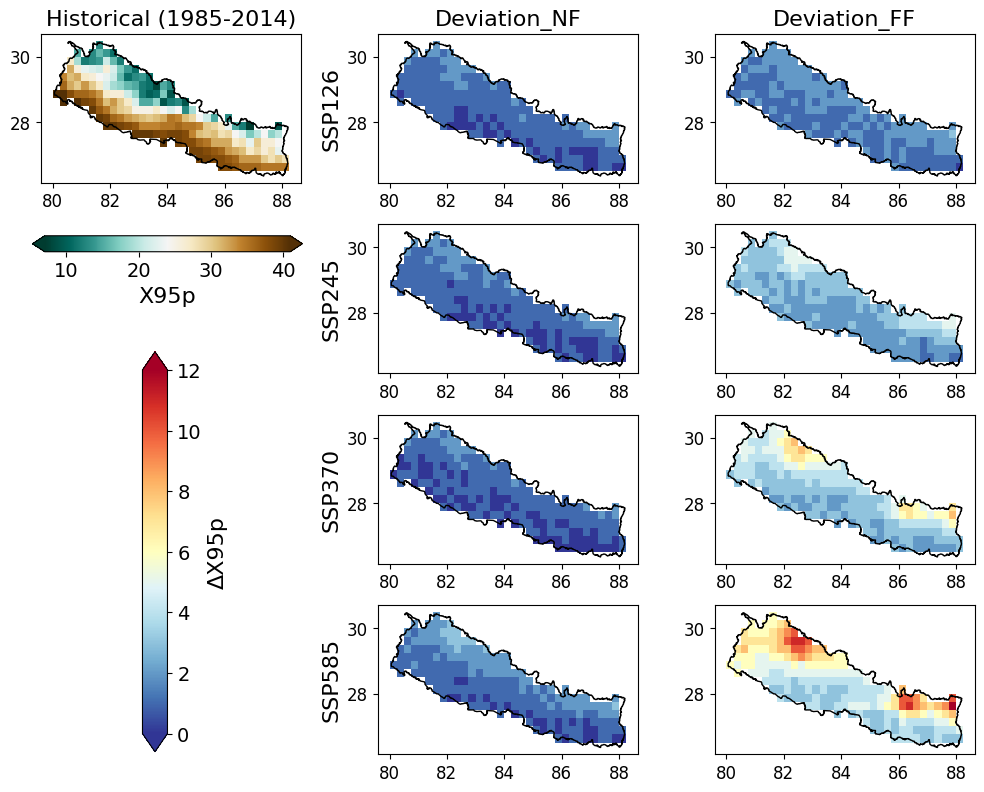

 90%|█████████ | 27/30 [06:03<00:40, 13.64s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


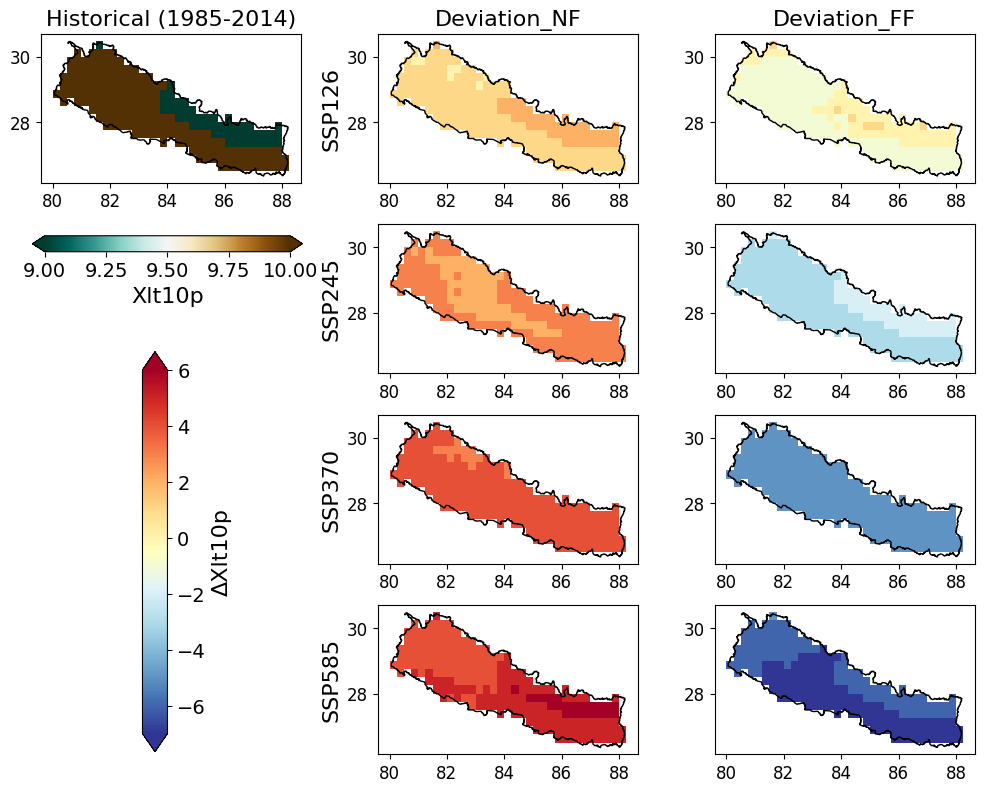

 93%|█████████▎| 28/30 [06:17<00:27, 13.64s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


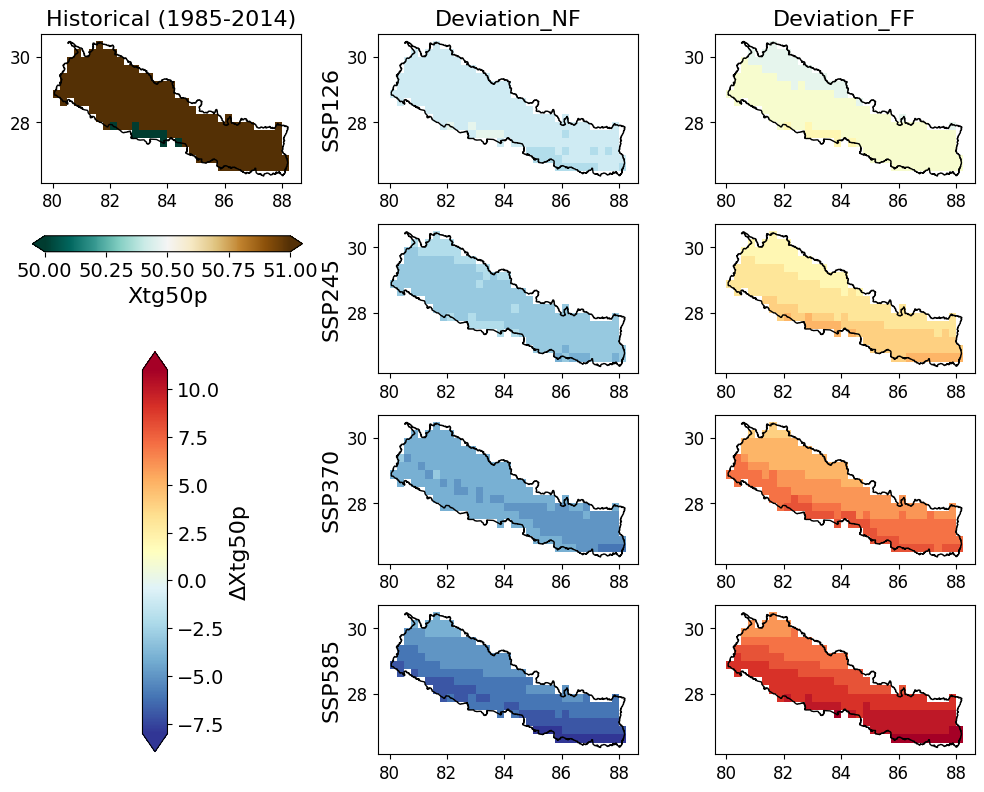

 97%|█████████▋| 29/30 [06:30<00:13, 13.38s/it]<ipython-input-8-ce510690c438>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


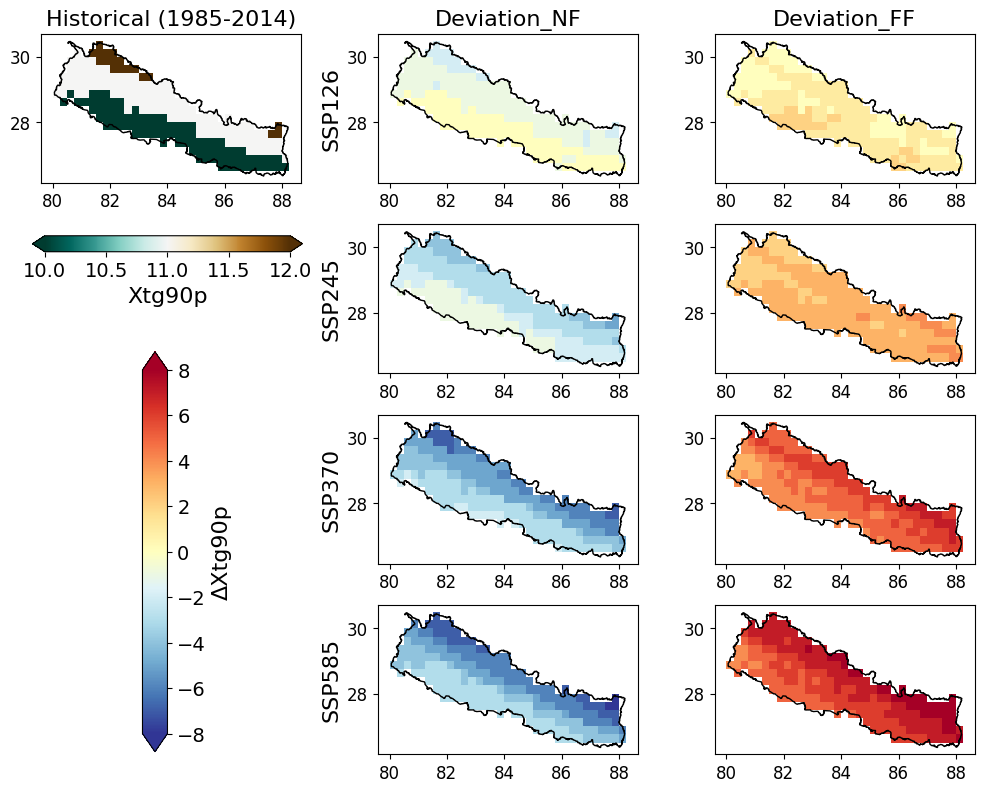

100%|██████████| 30/30 [06:43<00:00, 13.45s/it]


In [ ]:
import matplotlib.colors as mcolors
'''
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

# Define your custom colormap sequence here
custom_colormap = make_colormap([(0, 0.8, 0), (0.6, 0.3, 0)])'''

# Now you can use `custom_colormap` in your plotting code

indices = list(CM_dict['Ensemble_median']['ssp126'].keys())
#indices = ['CSDI','WSDI','Xlt10p','Nlt10p','Ntg90p','Xtg90p']
time_periods = ['1985-2014','Deviation_NF', 'Deviation_FF']
for h in tqdm(range(0,len(indices))):
  min_val_list_dev = []  # List to store all minimum values
  max_val_list_dev = []  # List to store all maximum values

  min_val_list_hist = []  # List to store all minimum values
  max_val_list_hist = []  # List to store all maximum values
  for i in range(0, len(CM)):
    for j in range(0, len(scenario)):
      min_val_dev = CM_dict[CM[i]][scenario[j]][indices[h]].iloc[:, 155:157].replace([np.inf, -np.inf], np.nan).min().min()
      max_val_dev = CM_dict[CM[i]][scenario[j]][indices[h]].iloc[:, 155:157].replace([np.inf, -np.inf], np.nan).max().max()
      min_val_list_dev.append(min_val_dev)
      max_val_list_dev.append(max_val_dev)

      min_val_hist = CM_dict[CM[i]][scenario[j]][indices[h]].iloc[:, 152:153].replace([np.inf, -np.inf], np.nan).min().min()
      max_val_hist = CM_dict[CM[i]][scenario[j]][indices[h]].iloc[:, 152:153].replace([np.inf, -np.inf], np.nan).max().min()
      min_val_list_hist.append(min_val_hist)
      max_val_list_hist.append(max_val_hist)

  vmin_dev = min(min_val_list_dev)
  vmax_dev = max(max_val_list_dev)

  vmin_hist = min(min_val_list_hist)
  vmax_hist = max(max_val_list_hist)

  #vmin = math.floor(min(min_val_list) / 10) * 10
  #vmax = math.ceil(max(max_val_list) / 10) * 10
  for i in range(0,len(CM)):
    fig, axs = plt.subplots(len(scenario), len(time_periods), figsize=(10, 8))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    cmap_ssp = plt.cm.RdYlBu
    cmap_ssp_reversed = cmap_ssp.reversed()

    norm_dev = Normalize(vmin=vmin_dev, vmax=vmax_dev)
    caxs = fig.add_axes([0.15, 0.055, 0.025, 0.5])  # [x, y, width, height]
    cb_dev = plt.colorbar(plt.cm.ScalarMappable(norm=norm_dev, cmap= cmap_ssp_reversed),
                      cax=caxs, orientation='vertical', extend='both',
                      shrink=0.5, location='right')
    cb_dev.set_label('Δ' +  indices[h], fontsize=16)
    cb_dev.ax.tick_params(labelsize=14)

    norm_hist = Normalize(vmin=vmin_hist, vmax=vmax_hist)
    cmap_hist = plt.cm.BrBG
    cmap_hist_reversed = cmap_hist.reversed()

    cbx = fig.add_axes([0.04, 0.68, 0.27, 0.02])  # [x, y, width, height]
    cb_hist = plt.colorbar(plt.cm.ScalarMappable(norm=norm_hist, cmap=cmap_hist_reversed),
                      cax=cbx, orientation='horizontal', extend='both',
                      shrink=0.5, label=indices[h])  # Remove location parameter
    cb_hist.set_label(indices[h], fontsize=16)
    cb_hist.ax.tick_params(labelsize=14)

    for j in range(0,len(scenario)):
        data = CM_dict[CM[i]][scenario[j]][indices[h]]
        for l in range(0,len(time_periods)):
          ax = axs[j, l]
          if (j>0) and (l==0):
            ax.remove()
          elif j==0 and l ==0:
            data.plot(column=time_periods[l], cmap= cmap_hist_reversed,
                              vmin=vmin_hist, vmax=vmax_hist, markersize=3,
                              ax=ax)
            Nepal.plot(edgecolor="k", color='none', ax=ax)
            ax.set_ylabel('')
            ax.set_title('Historical (1985-2014)', fontsize = 16)
            # Adjust the font size of tick labels on the plot axes
            ax.tick_params(axis='both', which='major', labelsize=12)
          else:
            data.plot(column=time_periods[l], cmap=cmap_ssp_reversed,
                              vmin=vmin_dev, vmax=vmax_dev, markersize=3,
                              ax=ax)
            Nepal.plot(edgecolor="k", color='none', ax=ax)
            # Adjust the font size of tick labels on the plot axes
            ax.tick_params(axis='both', which='major', labelsize=12)
            if j == 0:
              ax.set_title(f'{time_periods[l]}', fontsize = 16)
          if l == 1:
            ax.set_ylabel(scenario[j].upper(), fontsize=16)
    plt.tight_layout()
    plt.savefig('Spatial_comparison_plot/'+ CM[i] + '/' + CM[i] + '_' + indices[h]+'.png', bbox_inches='tight',dpi=300)
    plt.show()

